In [11]:
# وارد کردن کتابخانه ها
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [12]:
# load the dataset
dataset = pandas.read_csv( 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine= 'python' , skipfooter=3)
dataset = dataset.values.astype('float32')

In [13]:
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [14]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [15]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [16]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [17]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [19]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
trainX

array([[[0.01544401]],

       [[0.02702703]],

       [[0.05405405]],

       [[0.04826255]],

       [[0.03281853]],

       [[0.05984557]],

       [[0.08494207]],

       [[0.08494207]],

       [[0.06177607]],

       [[0.02895753]],

       [[0.        ]],

       [[0.02702703]],

       [[0.02123553]],

       [[0.04247104]],

       [[0.07142857]],

       [[0.05984557]],

       [[0.04054055]],

       [[0.08687258]],

       [[0.12741312]],

       [[0.12741312]],

       [[0.10424709]],

       [[0.05598456]],

       [[0.01930502]],

       [[0.06949806]],

       [[0.07915059]],

       [[0.08880308]],

       [[0.14285713]],

       [[0.11389962]],

       [[0.13127413]],

       [[0.14285713]],

       [[0.18339768]],

       [[0.18339768]],

       [[0.15444016]],

       [[0.11196911]],

       [[0.08108109]],

       [[0.1196911 ]],

       [[0.12934363]],

       [[0.14671814]],

       [[0.17181468]],

       [[0.14864865]],

       [[0.15250966]],

       [[0.22007

In [20]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))

C:\Users\ShahinN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ShahinN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
 - 2s - loss: 0.0502
Epoch 2/100
 - 0s - loss: 0.0267
Epoch 3/100
 - 0s - loss: 0.0201
Epoch 4/100
 - 0s - loss: 0.0181
Epoch 5/100
 - 0s - loss: 0.0172
Epoch 6/100
 - 0s - loss: 0.0164
Epoch 7/100
 - 0s - loss: 0.0157
Epoch 8/100
 - 0s - loss: 0.0148
Epoch 9/100
 - 0s - loss: 0.0140
Epoch 10/100
 - 0s - loss: 0.0133
Epoch 11/100
 - 0s - loss: 0.0124
Epoch 12/100
 - 0s - loss: 0.0117
Epoch 13/100
 - 0s - loss: 0.0108
Epoch 14/100
 - 0s - loss: 0.0099
Epoch 15/100
 - 0s - loss: 0.0091
Epoch 16/100
 - 0s - loss: 0.0082
Epoch 17/100
 - 0s - loss: 0.0074
Epoch 18/100
 - 0s - loss: 0.0068
Epoch 19/100
 - 0s - loss: 0.0060
Epoch 20/100
 - 0s - loss: 0.0053
Epoch 21/100
 - 0s - loss: 0.0047
Epoch 22/100
 - 1s - loss: 0.0042
Epoch 23/100
 - 0s - loss: 0.0036
Epoch 24/100
 - 0s - loss: 0.0032
Epoch 25/100
 - 0s - loss: 0.0029
Epoch 26/100
 - 0s - loss: 0.0026
Epoch 27/100
 - 0s - loss: 0.0024
Epoch 28/100
 - 0s - loss: 0.0022
Epoch 29/100
 - 0s - loss: 0.0022
Epoch 30/100
 - 0s - l

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [18]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [19]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print( 'Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( 'Test Score: %.2f RMSE' % (testScore))

Train Score: 22.17 RMSE
Test Score: 48.07 RMSE


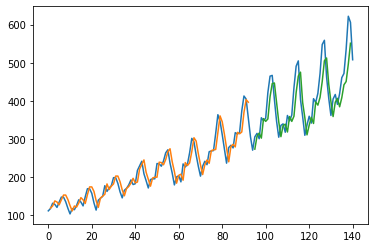

In [20]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict



# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()